# 1. Credit Fraud Detection - Dealing with Imbalanced Datasets

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
 
link : https://www.kaggle.com/gpreda/credit-card-fraud-detection-predictive-models

## Loading Packages and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import gc
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import xgboost as xgb

## Glimpse the Data

In [2]:
df = pd.read_csv('data/creditcard.csv')
print('Credict Card Shape', df.shape)

Credict Card Shape (284807, 31)


In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### Missing Value

In [5]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count() * 100).sort_values(ascending = False)
pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


결측치가 없는 것으로 보인다.

### Unbalanced Data

In [6]:
temp = df['Class'].value_counts()

df_dic = pd.DataFrame({'Class' : temp.index, 'values' : temp.values})

trace = go.Bar(x = df_dic['Class'], y = df_dic['values'],
              name = 'Credit Card Fraud Class - Data Unbalance (Not Fraud = 0, Fraud = 1)',
              marker = dict(color = 'skyblue'),
              text = df_dic['values'])

data = [trace]
layout = dict(title = 'Credit Card Fraud Class - Data Unbalance (Not Fraud = 0, Fraud = 1)',
             xaxis = dict(title = 'Class', showticklabels = True),
             yaxis = dict(title = 'Number of Transactions'),
             hovermode = 'closest', width = 600)
fig = dict(data = data, layout = layout)
iplot(fig, filename= 'class')

In [7]:
#sns.barplot(x = temp.index, y = temp.values)
#plt.title('Credit Card Fraud Class', size = 15)
#plt.xlabel('Class')
#plt.ylabel('Count')
#plt.show()

492(0.172%)만이 사기다. Credit Card Fraud 데이터의 target이 상당히 불균형하다는 것을 의미한다.

## EDA

In [8]:
class_0 = df.loc[df['Class'] == 0]['Time']
class_1 = df.loc[df['Class'] == 1]['Time']

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist = False, show_rug = False)
fig['layout'].update(title = 'Credict Card Transaction Time Density Plot', xaxis = dict(title = 'Time[s]'))
iplot(fig, filename = 'dist_only')

In [9]:
#plt.figure(figsize = (14,4))
#plt.title('Credit Card Transaction Time Density plot')
#sns.set_color_codes('pastel')
#sns.distplot(class_0, kde = True, bins = 480)
#sns.distplot(class_1, kde = True, bins = 480)
#plt.show()

In [10]:
df['Hour'] = df['Time'].apply(lambda x : np.floor(x / 3600))

tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df2 = pd.DataFrame(tmp)
df2.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df2.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


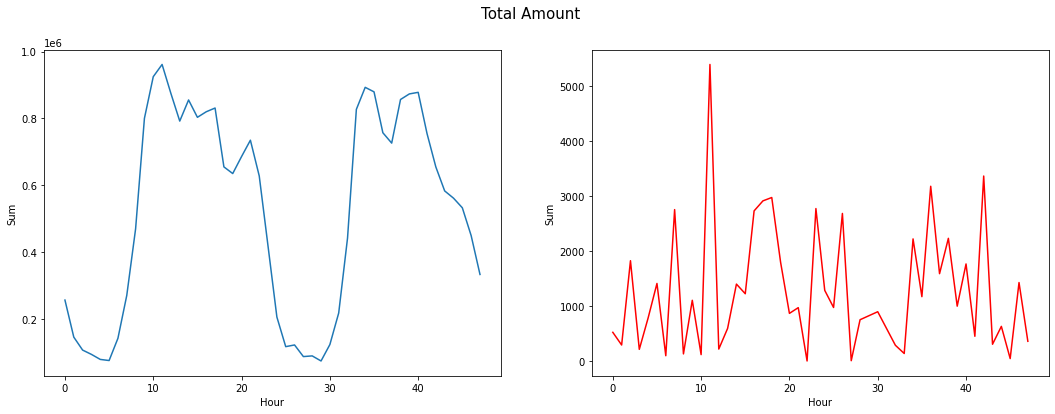

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (18,6))
s = sns.lineplot(ax = ax1, x = 'Hour', y = 'Sum', data = df2.loc[df2['Class'] == 0])
s = sns.lineplot(ax = ax2, x = 'Hour', y = 'Sum', data = df2.loc[df2['Class'] == 1], color = 'red')
plt.suptitle('Total Amount', size = 15)
plt.show()

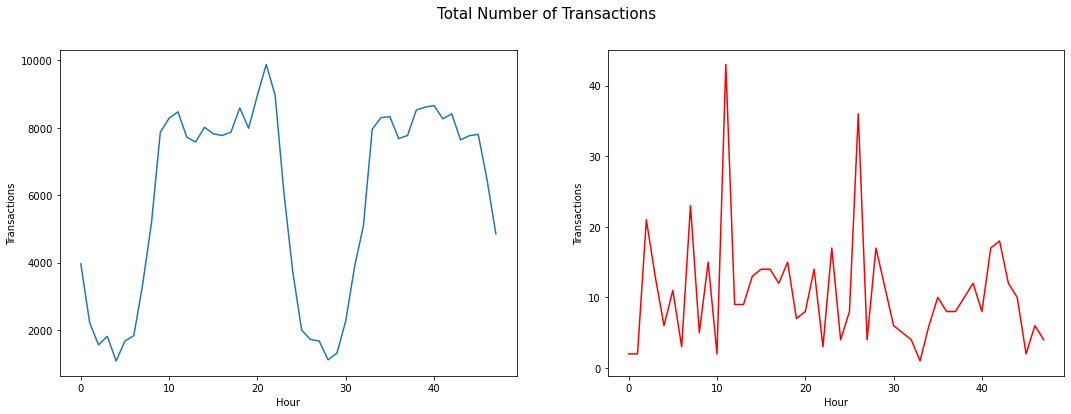

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (18,6))
s = sns.lineplot(ax = ax1, x = 'Hour', y = 'Transactions', data = df2.loc[df2['Class'] == 0])
s = sns.lineplot(ax = ax2, x = 'Hour', y = 'Transactions', data = df2.loc[df2['Class'] == 1], color = 'red')
plt.suptitle('Total Number of Transactions', size = 15)
plt.show()

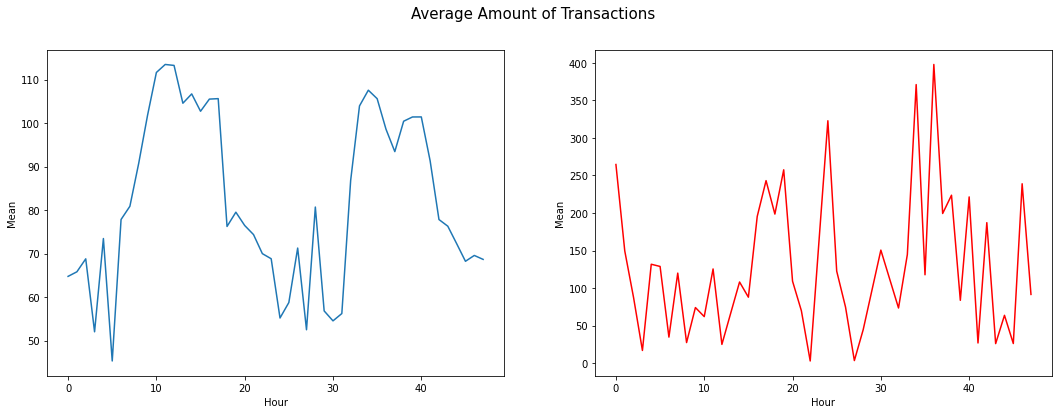

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (18,6))
s = sns.lineplot(ax = ax1, x = 'Hour', y = 'Mean', data = df2.loc[df2['Class'] == 0])
s = sns.lineplot(ax = ax2, x = 'Hour', y = 'Mean', data = df2.loc[df2['Class'] == 1], color = 'red')
plt.suptitle('Average Amount of Transactions', size = 15)
plt.show()

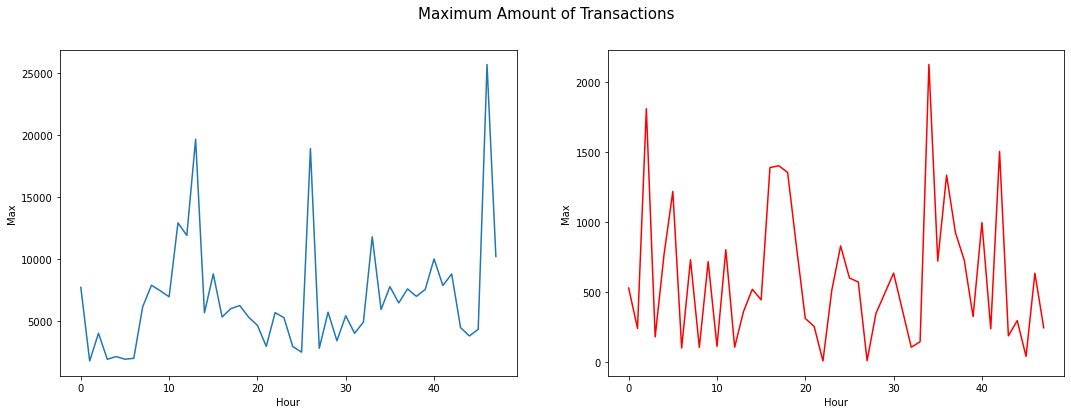

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (18,6))
s = sns.lineplot(ax = ax1, x = 'Hour', y = 'Max', data =df2.loc[df2['Class'] == 0])
s = sns.lineplot(ax = ax2, x = 'Hour',  y = 'Max', data = df2.loc[df2['Class'] == 1], color = 'red')
plt.suptitle('Maximum Amount of Transactions', size = 15)
plt.show()

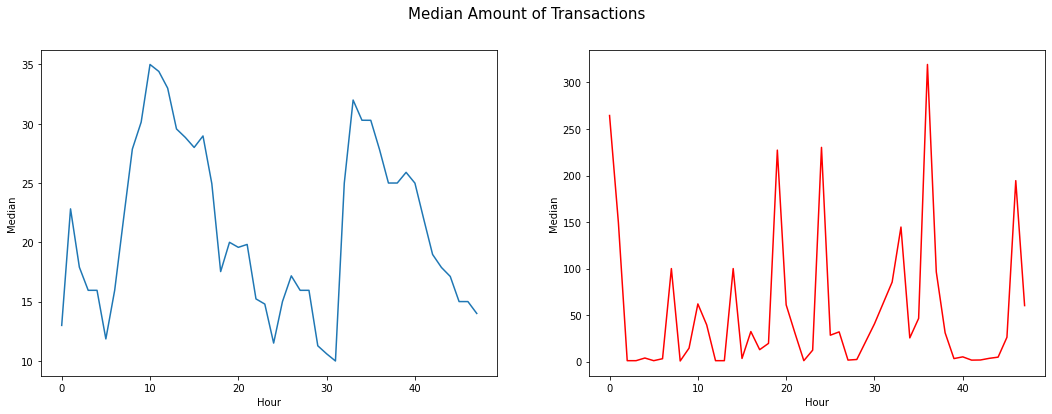

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (18,6))
s = sns.lineplot(ax = ax1, x = 'Hour', y = 'Median', data =df2.loc[df2['Class'] == 0])
s = sns.lineplot(ax = ax2, x = 'Hour',  y = 'Median', data = df2.loc[df2['Class'] == 1], color = 'red')
plt.suptitle('Median Amount of Transactions', size = 15)
plt.show()

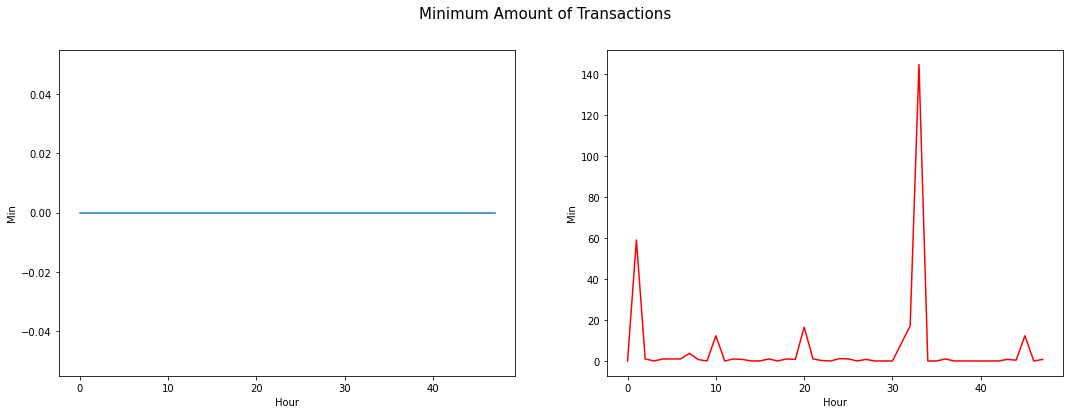

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (18,6))
s = sns.lineplot(ax = ax1, x = 'Hour', y = 'Min', data =df2.loc[df2['Class'] == 0])
s = sns.lineplot(ax = ax2, x = 'Hour',  y = 'Min', data = df2.loc[df2['Class'] == 1], color = 'red')
plt.suptitle('Minimum Amount of Transactions', size = 15)
plt.show()

### Transaction Amount

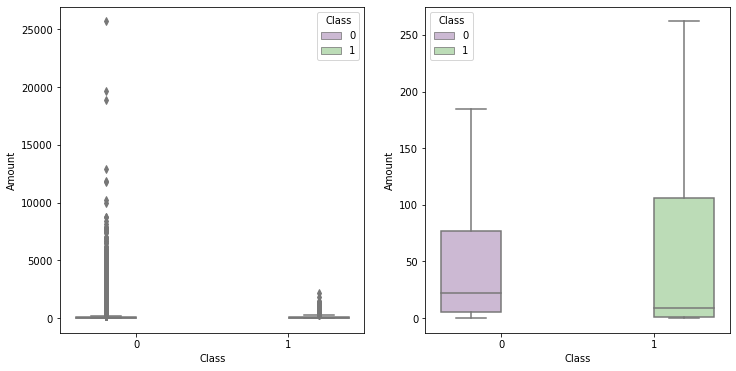

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12,6))
s = sns.boxplot(ax = ax1, x = 'Class', y = 'Amount', hue = 'Class', data = df, palette = 'PRGn', showfliers = True)
s = sns.boxplot(ax = ax2, x = 'Class', y = 'Amount', hue = 'Class', data = df, palette = 'PRGn', showfliers = False)

In [18]:
tmp = df[['Amount', 'Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class']== 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
fraud = df.loc[df['Class'] == 1]

trace = go.Scatter(x = fraud['Time'], y = fraud['Amount'],
                  name = 'Amount',
                  marker = dict(color = 'rgb(238, 23, 11)',
                               line = dict(color = 'red', 
                                          width = 1),
                                          opacity = 0.5),
                  text = fraud['Amount'],
                  mode = 'markers')
data = [trace]
layout = dict(title = 'Amount of Fraudulent Transactions',
             xaxis = dict(title = 'Time[s]', showticklabels = True),
             yaxis = dict(title = 'Amount'),
             hovermode = 'closest')
fig = dict(data = data, layout = layout)
iplot(fig, filename = 'fraud-amount')

### Features Correlation

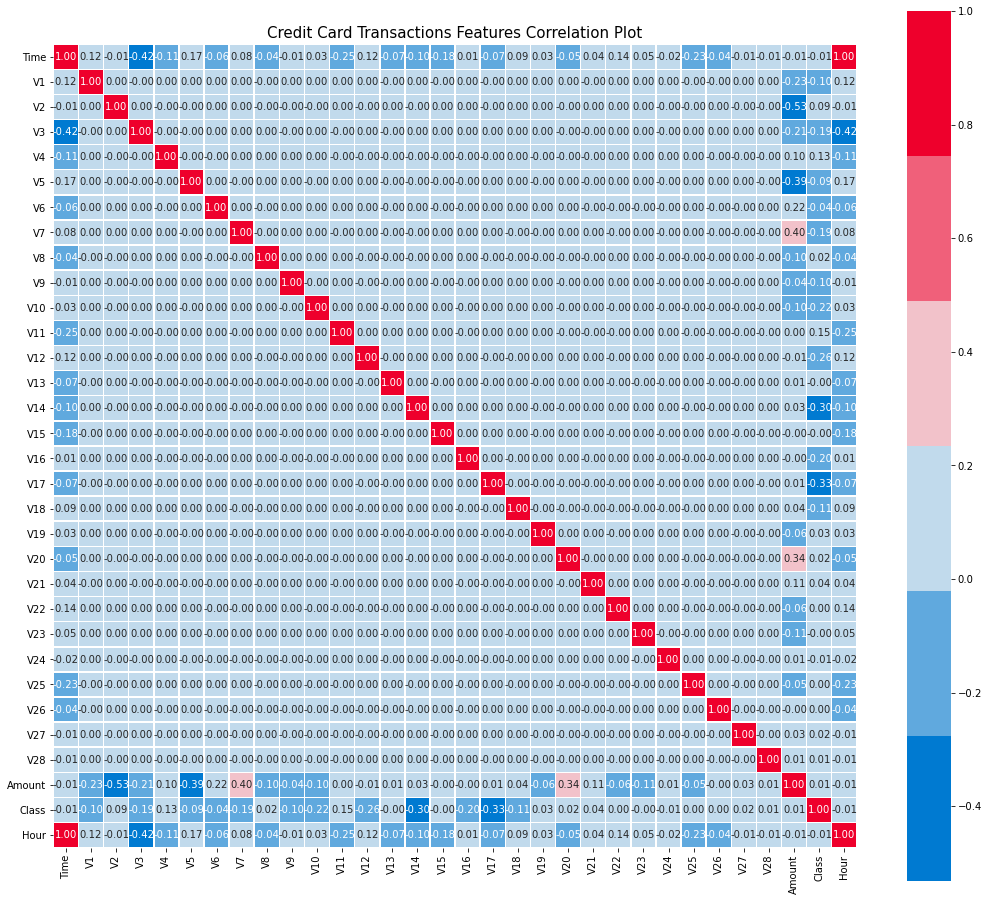

In [21]:
plt.figure(figsize = (18,16))

corr = df.corr()
cmap = sns.diverging_palette(250, 10,100)
sns.heatmap(corr, xticklabels = corr.columns,
            yticklabels = corr.columns, 
            cmap = cmap, 
            square = True, 
            linewidth = 0.5, 
            annot= True,
           fmt = '.2f')
plt.title('Credit Card Transactions Features Correlation Plot', size = 15)
plt.show()

* Time and V3
* Amount and V7, V20 (positive)
* Amount and V2, V5 (negative)

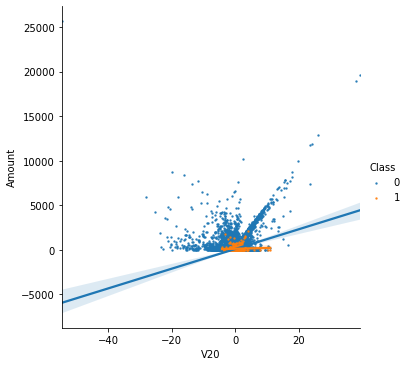

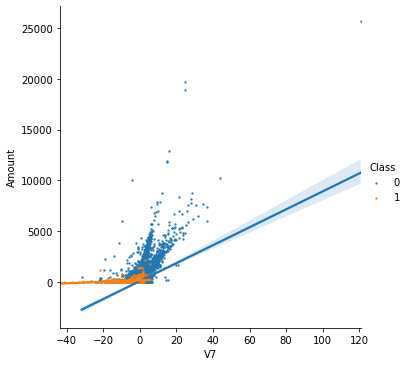

In [22]:
s = sns.lmplot(x = 'V20', y = 'Amount', data = df, hue = 'Class', fit_reg = True, scatter_kws = {'s' : 2})
s = sns.lmplot(x = 'V7', y = 'Amount', data = df, hue = 'Class', fit_reg = True, scatter_kws = {'s' : 2})
plt.show()

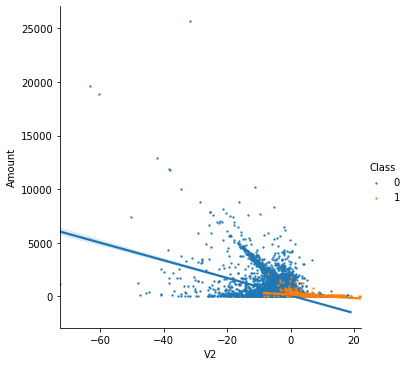

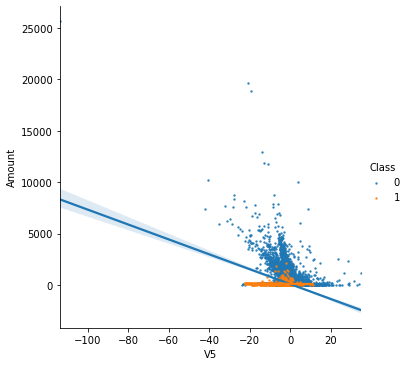

In [23]:
s = sns.lmplot(x = 'V2', y = 'Amount', data = df, hue= 'Class', fit_reg = True, scatter_kws = {'s' : 2})
s = sns.lmplot(x = 'V5', y = 'Amount', data = df, hue = 'Class', fit_reg = True, scatter_kws = {'s' : 2})
plt.show()

양의 상관계수를 가진 두 변수(V7, V20)는 Class = 0일 때, Class = 1인 경우보다 기울기가 더 높다.

반면 음의 상관계수를 가진 두 변수(V2, V5)는 Class =0일 때, Class =1인 경우보다 기울기가 더 낮다.

### Features Density Plot

In [ ]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8, 4, figsize = (16,28))

for feature in var:
    i += 1
    plt.subplot(8, 4, i)
    sns.kdeplot(t0[feature], label = 'Class : 0')
    sns.kdeplot(t1[feature], label = 'Class : 1')
    plt.xlabel(feature, fontsize = 12)
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show()

* Class : V4, V11의 Class별 분포는 분명하게 분리되어있는 것을 확인 할 수 있다. 

* Class : V12, V14, V18의 Class별 분포 또한 부분적으로 분리되어있다.
    
* Class: V1, V2, V3, V10은 꽤나 뚜렷한 분포를 보인다. 반면 V25, V26, V28은 Class별로 비슷한 분포를 보인다.
    
* 일반적으로 정상적인 거래내역(Class : 0)인 feature들은 평균 0에 머무지만, 사기 거래내역(Class :1)인 대부분 skew된 형태를 보인다.

## Predictive Models

### Define Predictors and target values

In [ ]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

### Split data in train, test

In [ ]:
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 0, shuffle= True)
train_df , valid_df = train_test_split(train_df, test_size = 0.2, random_state = 0, shuffle = True)

### Model

<b> RandomForest Classifier </b>

In [ ]:
clf_rf = RandomForestClassifier(criterion='gini', n_estimators = 100, n_jobs = -1)
clf_rf.fit(train_df[predictors], train_df[target].values)
preds = clf_rf.predict(valid_df[predictors])

<b> Feature Importance

In [ ]:
def plot_feature_importance(model):
    tmp = pd.DataFrame({'Feature' : predictors, 'Feature importance' : model.feature_importances_})
    tmp = tmp.sort_values(by = 'Feature importance', ascending = False)
    # plot
    plt.figure(figsize = (10,6))
    sns.barplot(x = 'Feature importance', y = 'Feature', data = tmp)
    plt.title(str(model) + ' Feature importance', fontsize = 16)
    plt.xlabel('Feature Importance', size = 14)
    plt.ylabel('Feature', size = 14)
    plt.show()

In [ ]:
plot_feature_importance(clf_rf)

V17 > V12 > V14 > V10 > V11 > V16순으로 Feature importance가 크다.

In [ ]:
cm = pd.crosstab(valid_df[target].values, preds, rownames = ['Actual'], colnames = ['Predicted'])
fig, (ax1) = plt.subplots(ncols = 1, figsize = (5,5))
sns.heatmap(cm,
           xticklabels=['Not Fraud', 'Fraud'],
           yticklabels= ['Not Fraud', 'Fruad'],
           annot = True,
           fmt = '.2f',
           ax = ax1, 
           linewidths=.2,
            cmap = 'Blues')
plt.title('Confusion Matrix', size = 14)
plt.show()

In [ ]:
print('Random Forest AUC', round(roc_auc_score(valid_df[target].values, preds),3))

<b> XGBoost

In [ ]:
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

params = {}
params['objecitve'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 0

In [ ]:
model = xgb.train(params, dtrain, 100, watchlist, early_stopping_rounds = 50, maximize = True, verbose_eval = 50)

<b> Feature Importance

In [ ]:
fig, (ax) = plt.subplots(ncols = 1, figsize = (8,5))
xgb.plot_importance(model, height = 0.8, title = 'Features importance(XGBoost)', ax = ax, color = 'green')
plt.show()

In [ ]:
preds = model.predict(dtest)

print('XGBoost AUC: ', round(roc_auc_score(test_df[target].values, preds),3))

<b> LightGBM

In [ ]:
params = {
    'boosting_type' : 'gbdt',
    'objective' : 'binary',
    'metric' : 'auc',
    'learning_rate' : 0.05,
    'num_leaves' : 7, # 2^(max_depth)보다 작게 한다.
    'max_depth' : 4, 
    'min_child_samples' : 100,
    'max_bin' : 100,
    'subsample' : 0.9,
    'subsample_freq' : 1,
    'colsample_bytree' : 0.7,
    'min_child_weight' : 0,
    'min_split_gain': 0,
    'nthread':8,
    'verbose' : 0,
    'scale_pos_weight' : 150
}

In [ ]:
dtrain = lgb.Dataset(train_df[predictors].values,
                     label = train_df[target].values, 
                     feature_name = predictors)

dvalid = lgb.Dataset(valid_df[predictors].values,
                    label = valid_df[target].values,
                    feature_name = predictors)

evals_results = {}

model = lgb.train(params, 
                  dtrain, 
                  valid_sets  = [dtrain, dvalid], 
                  valid_names = ['train', 'valid'], 
                  evals_result = evals_results,
                  num_boost_round = 500,
                  verbose_eval = 50,
                  feval = None
                )

<b> Feature Importance

In [ ]:
fig, (ax) = plt.subplots(ncols = 1, figsize = (8,5))
lgb.plot_importance(model, height = 0.8, title = 'Feature importance(LightGBM)', ax = ax, color= 'red')
plt.show()

In [ ]:
preds = model.predict(test_df[predictors])
print('LGBM AUC: ', round(roc_auc_score(test_df[target].values, preds),3))